Identify determinants and quantify the contribution of factors to STEM professionals' hourly wages.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# Import dataset. Concat datasets of 12 months in 2025
month = ["01", "02", "03", "04", "05", "06", "07", "08", "09", "10", "11", "12"]
usecols = ["HRLYEARN", "PROV", "AGE_12", "GENDER", "MARSTAT", "EDUC", "MJH",
           "COWMAIN", "IMMIG", "NAICS_21", "NOC_43", "UHRSMAIN", "FTPTMAIN",
           "TENURE", "PREVTEN", "UNION", "PERMTEMP", "FIRMSIZE", "EFAMTYPE", "FINALWT"]

df = pd.DataFrame()
for i in month:
  df_i = pd.read_csv(f'/content/drive/MyDrive/Study/M2M Data Talent/Capstone 2/dataset/pub{i}25.csv',
                   usecols=usecols)
  df = pd.concat([df, df_i], axis=0)

df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1364679 entries, 0 to 111626
Data columns (total 20 columns):
 #   Column    Non-Null Count    Dtype  
---  ------    --------------    -----  
 0   PROV      1364679 non-null  int64  
 1   AGE_12    1364679 non-null  int64  
 2   GENDER    1364679 non-null  int64  
 3   MARSTAT   1364679 non-null  int64  
 4   EDUC      1364679 non-null  int64  
 5   MJH       794297 non-null   float64
 6   COWMAIN   884178 non-null   float64
 7   IMMIG     1364679 non-null  int64  
 8   NAICS_21  884178 non-null   float64
 9   NOC_43    884178 non-null   float64
 10  UHRSMAIN  794297 non-null   float64
 11  FTPTMAIN  794297 non-null   float64
 12  TENURE    794297 non-null   float64
 13  PREVTEN   89881 non-null    float64
 14  HRLYEARN  688793 non-null   float64
 15  UNION     688793 non-null   float64
 16  PERMTEMP  688793 non-null   float64
 17  FIRMSIZE  688793 non-null   float64
 18  EFAMTYPE  1364679 non-null  int64  
 19  FINALWT   1364679 non-null 

In [ ]:
# Filter only data of employed people (pay rate greater than 0), and working as STEM professionals
df = df[(df["HRLYEARN"]>0) & (df["NAICS_21"]==14) & (df["NOC_43"]>10) & (df["NOC_43"]<14)]
df.head()

,PROV,AGE_12,GENDER,MARSTAT,EDUC,MJH,COWMAIN,IMMIG,NAICS_21,NOC_43,UHRSMAIN,FTPTMAIN,TENURE,PREVTEN,HRLYEARN,UNION,PERMTEMP,FIRMSIZE,EFAMTYPE,FINALWT
30,59,4,1,6,5,1.0,2.0,1,14.0,12.0,400.0,1.0,36.0,NaN,4115.0,3.0,1.0,4.0,1,595
66,48,2,1,6,5,1.0,2.0,3,14.0,12.0,350.0,1.0,9.0,NaN,3400.0,3.0,1.0,1.0,1,1490
104,35,3,2,1,5,2.0,2.0,1,14.0,11.0,400.0,1.0,12.0,NaN,3365.0,3.0,1.0,3.0,2,593
269,13,5,1,1,5,1.0,2.0,3,14.0,11.0,375.0,1.0,20.0,NaN,1973.0,3.0,1.0,1.0,6,89
294,48,7,1,1,4,2.0,2.0,3,14.0,12.0,400.0,1.0,224.0,NaN,6500.0,3.0,1.0,4.0,3,1020


In [ ]:
# Remove columns of occupations NAICS_21 and NOC_43
df = df.drop(columns=["NAICS_21", "NOC_43"])

df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 18795 entries, 30 to 111597
Data columns (total 18 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   PROV      18795 non-null  int64  
 1   AGE_12    18795 non-null  int64  
 2   GENDER    18795 non-null  int64  
 3   MARSTAT   18795 non-null  int64  
 4   EDUC      18795 non-null  int64  
 5   MJH       18795 non-null  float64
 6   COWMAIN   18795 non-null  float64
 7   IMMIG     18795 non-null  int64  
 8   UHRSMAIN  18795 non-null  float64
 9   FTPTMAIN  18795 non-null  float64
 10  TENURE    18795 non-null  float64
 11  PREVTEN   0 non-null      float64
 12  HRLYEARN  18795 non-null  float64
 13  UNION     18795 non-null  float64
 14  PERMTEMP  18795 non-null  float64
 15  FIRMSIZE  18795 non-null  float64
 16  EFAMTYPE  18795 non-null  int64  
 17  FINALWT   18795 non-null  int64  
dtypes: float64(10), int64(8)
memory usage: 2.7 MB


In [ ]:
# Drop columns PRETEN as no data
df = df.drop(columns=["PREVTEN"])

In [ ]:
# Check if any missing data
df.isnull().sum()

,0
PROV,0
AGE_12,0
GENDER,0
MARSTAT,0
EDUC,0
MJH,0
COWMAIN,0
IMMIG,0
UHRSMAIN,0
FTPTMAIN,0


In [ ]:
# Double check whether any missing value coded as special number
df.describe()

,PROV,AGE_12,GENDER,MARSTAT,EDUC,MJH,COWMAIN,IMMIG,UHRSMAIN,FTPTMAIN,TENURE,HRLYEARN,UNION,PERMTEMP,FIRMSIZE,EFAMTYPE,FINALWT
count,18795.000000,18795.000000,18795.00000,18795.000000,18795.000000,18795.000000,18795.000000,18795.000000,18795.000000,18795.000000,18795.000000,18795.000000,18795.000000,18795.000000,18795.000000,18795.000000,18795.000000
mean,34.937537,5.466188,1.23735,2.710348,4.722001,1.033147,1.996595,2.412663,386.314711,1.031604,74.966534,4951.820378,2.922373,1.122054,2.964246,4.425007,424.935462
std,14.314630,2.314126,0.42547,2.193001,1.081406,0.179025,0.058256,0.794635,52.237370,0.174948,71.658182,2281.658399,0.367898,0.494947,1.129715,4.633182,365.354223
min,10.000000,1.000000,1.00000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1000.000000,1.000000,1.000000,1.000000,1.000000,6.000000
25%,24.000000,4.000000,1.00000,1.000000,4.000000,1.000000,2.000000,2.000000,375.000000,1.000000,21.000000,3400.000000,3.000000,1.000000,2.000000,2.000000,168.000000
50%,35.000000,5.000000,1.00000,1.000000,5.000000,1.000000,2.000000,3.000000,400.000000,1.000000,47.000000,4500.000000,3.000000,1.000000,3.000000,3.000000,288.000000
75%,46.000000,7.000000,1.00000,6.000000,5.000000,1.000000,2.000000,3.000000,400.000000,1.000000,107.000000,6000.000000,3.000000,1.000000,4.000000,5.000000,549.000000
max,59.000000,12.000000,2.00000,6.000000,6.000000,2.000000,2.000000,3.000000,910.000000,2.000000,240.000000,20673.000000,3.000000,4.000000,4.000000,18.000000,2853.000000


In [ ]:
# Hourly wage rate & Hours per week to correct decimal
df["HRLYEARN"] = df["HRLYEARN"]/100
df["UHRSMAIN"] = df["UHRSMAIN"]/10

In [ ]:
# Remove outliers of Hourly wage and Usual working hours
def remove_outliers(data, col):
  Q3 = np.quantile(data[col], 0.75)
  Q1 = np.quantile(data[col], 0.25)
  IQR = Q3 - Q1
  lower_range = Q1 - 1.5*IQR
  upper_range = Q3 + 1.5*IQR

  data = data[(data[col] >= lower_range) & (data[col] <= upper_range)]
  return data

df = remove_outliers(df, "HRLYEARN")
df = remove_outliers(df, "UHRSMAIN")

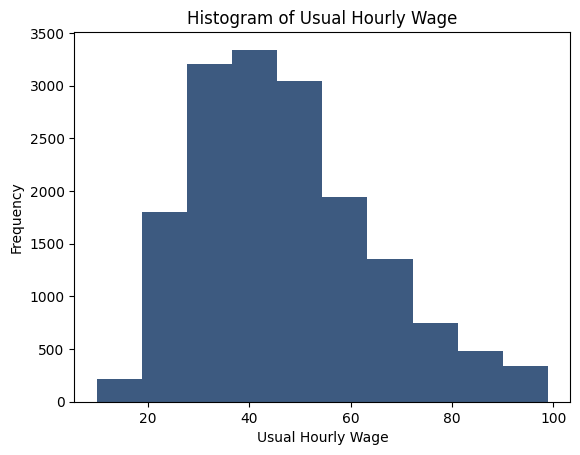

In [ ]:
# Histogram of hourly rate
plt.hist(df["HRLYEARN"], color="#3D5A80")
plt.xlabel("Usual Hourly Wage")
plt.ylabel("Frequency")
plt.title("Histogram of Usual Hourly Wage")
plt.show()

In [ ]:
#Correlation of variables
correlation_matrix = df.corr()["HRLYEARN"]
print(correlation_matrix)

PROV        0.121807
AGE_12      0.286032
GENDER     -0.122683
MARSTAT    -0.251724
EDUC        0.228185
MJH        -0.063563
COWMAIN     0.017376
IMMIG      -0.097788
UHRSMAIN   -0.006770
FTPTMAIN         NaN
TENURE      0.166043
HRLYEARN    1.000000
UNION       0.036318
PERMTEMP   -0.184205
FIRMSIZE    0.228489
EFAMTYPE   -0.081200
FINALWT     0.055614
Name: HRLYEARN, dtype: float64


In [ ]:
# Dictionary for categorical features
cat_mappings = {
    "PROV": {10: "NL", 11: "PE", 12: "NS", 13: "NB",
             24: "QC", 35: "ON", 46: "MB", 47: "SK",
             48: "AB", 59: "BC"},
    "AGE_12": {1:	"15-19", 2: "20-24", 3: "25-29",
               4: "30-34", 5: "35-39", 6: "40-44",
               7: "45-49", 8: "50-54", 9: "55-59",
               10: "60-64", 11: "65-69", 12: ">70"},
    "GENDER": {1: "Men", 2: "Women"},
    "MARSTAT": {1: "Married", 2:	"Common-law", 3: "Widowed", 4:	"Separated",
                5:"Divorced", 6: "Single"},
    "EDUC": {0: "0-8 yrs", 1: "Some high school", 2: "High school", 3: "Some postsecondary",
             4:	"Diploma", 5:	"Bachelor", 6:	"Above bachelor"},
    "MJH": {1: "Single jobholder", 2: "Multiple jobholder"},
    "COWMAIN": {1: "Public EE", 2: "Private EE", 3: "Self-employed inc. with paid help",
                3: "Self-employed inc. no paid help", 5: "Self-employed non-inc. with paid help",
                6: "Self-employed non-inc. no paid help", 7: "Unpaid"},
    "IMMIG": {1: "Immg <10yrs", 2: "Immg >10yrs", 3: "Non-immg"},
    "FTPTMAIN": {1: "Full-time", 2: "Part-time"},
    "UNION": {1: "Union", 2: "Not member but covered", 3: "Non-unionized"},
    "PERMTEMP": {1: "Permanent", 2: "Seasonal", 3: "Contract", 4: "Casual"},
    "FIRMSIZE": {1: "<20", 2: "20-99", 3: "100-500", 4: ">500"},
    "EFAMTYPE": {1: "Single", 2: "Dual-earner no child", 3: "Dual-earner child 0-17",
                 4: "Dual-earner child 18-24", 5: "Man-earner no child",
                 6: "Man-earner child 0-17", 7: "Man-earner child 18-24",
                 8: "Woman-earner no child", 9: "Woman-earner child 0-17",
                 10: "Woman-earner child 18-24", 11: "Non-earner no child",
                 12: "Non-earner child 0-17", 13: "Non-earner child 18-24",
                 14: "Lone-parent child 0-17", 15: "Lone-parent child 18-24",
                 16: "Unemployed Lone-parent child 0-17", 17: "Unemployed Lone-parent child 18-24"}
}

/tmp/ipython-input-3677458725.py:16: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  boxplot = plt.boxplot(data_dict.values(), labels=display_labels, patch_artist=True)


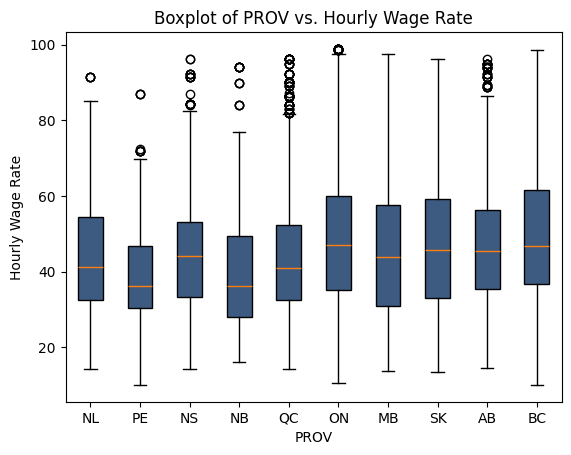

/tmp/ipython-input-3677458725.py:16: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  boxplot = plt.boxplot(data_dict.values(), labels=display_labels, patch_artist=True)


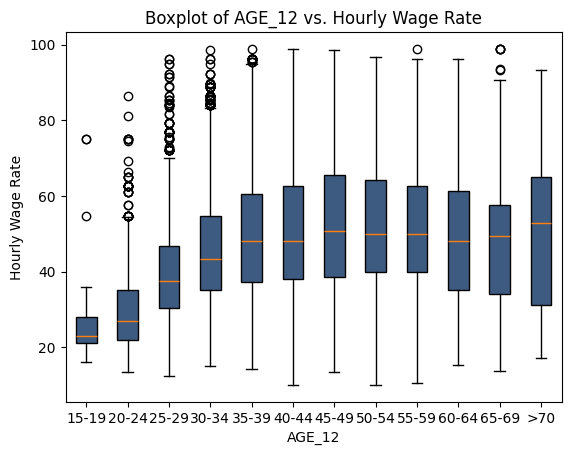

/tmp/ipython-input-3677458725.py:16: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  boxplot = plt.boxplot(data_dict.values(), labels=display_labels, patch_artist=True)


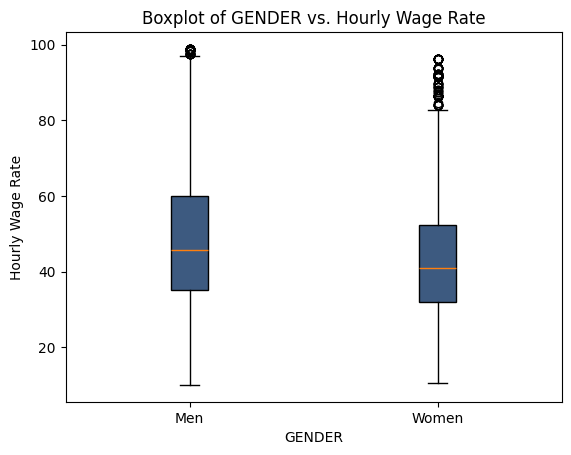

/tmp/ipython-input-3677458725.py:16: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  boxplot = plt.boxplot(data_dict.values(), labels=display_labels, patch_artist=True)


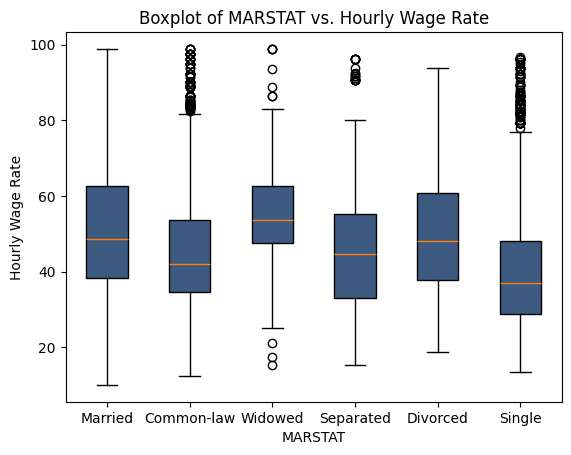

/tmp/ipython-input-3677458725.py:16: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  boxplot = plt.boxplot(data_dict.values(), labels=display_labels, patch_artist=True)


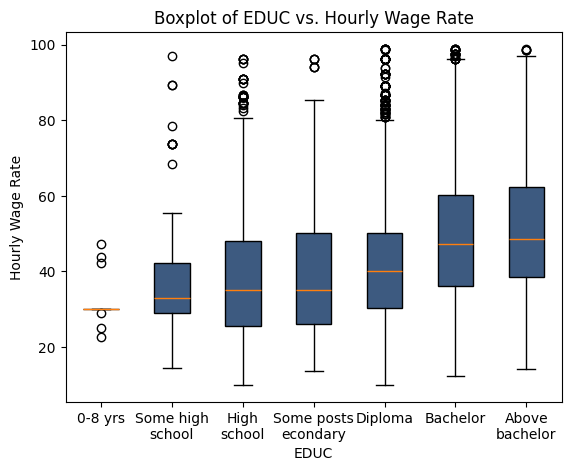

/tmp/ipython-input-3677458725.py:16: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  boxplot = plt.boxplot(data_dict.values(), labels=display_labels, patch_artist=True)


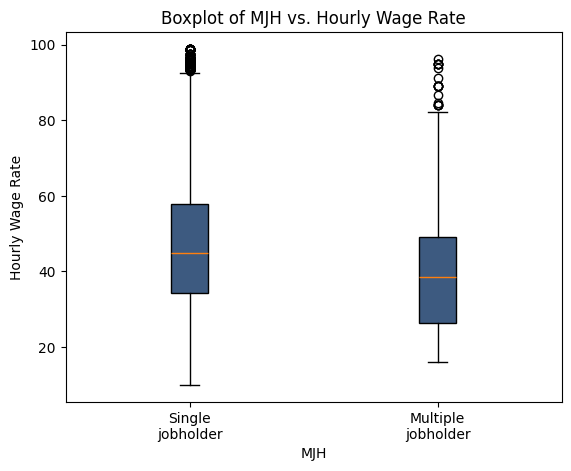

/tmp/ipython-input-3677458725.py:16: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  boxplot = plt.boxplot(data_dict.values(), labels=display_labels, patch_artist=True)


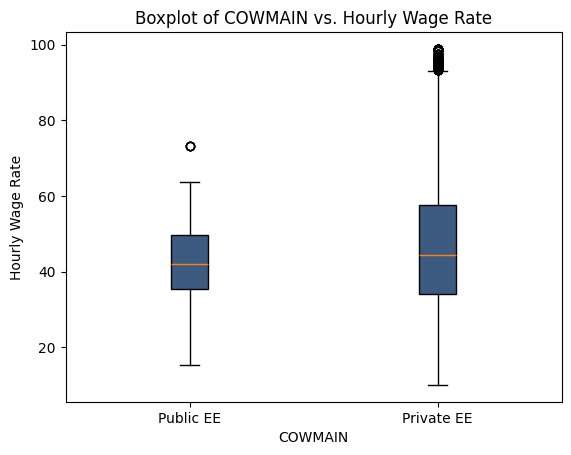

/tmp/ipython-input-3677458725.py:16: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  boxplot = plt.boxplot(data_dict.values(), labels=display_labels, patch_artist=True)


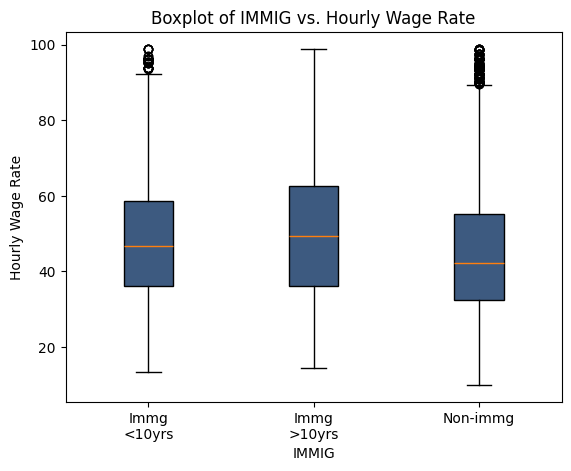

/tmp/ipython-input-3677458725.py:16: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  boxplot = plt.boxplot(data_dict.values(), labels=display_labels, patch_artist=True)


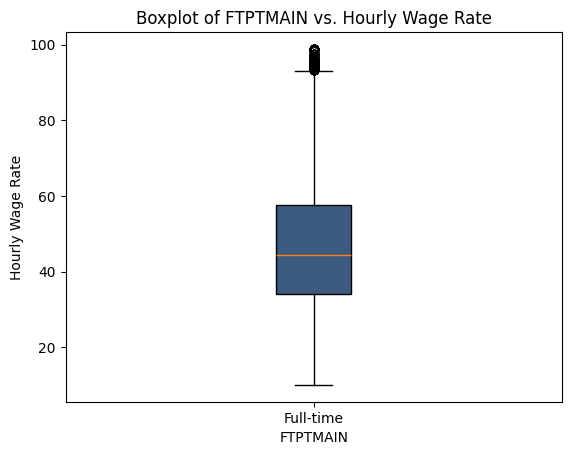

/tmp/ipython-input-3677458725.py:16: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  boxplot = plt.boxplot(data_dict.values(), labels=display_labels, patch_artist=True)


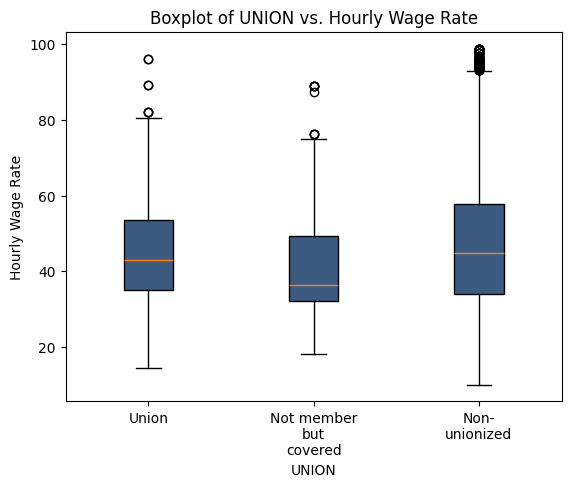

/tmp/ipython-input-3677458725.py:16: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  boxplot = plt.boxplot(data_dict.values(), labels=display_labels, patch_artist=True)


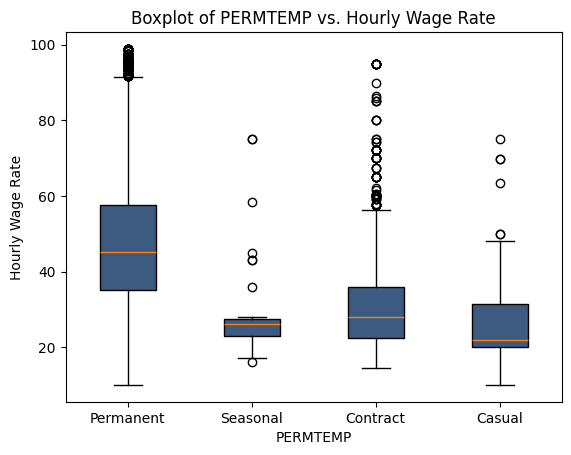

/tmp/ipython-input-3677458725.py:16: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  boxplot = plt.boxplot(data_dict.values(), labels=display_labels, patch_artist=True)


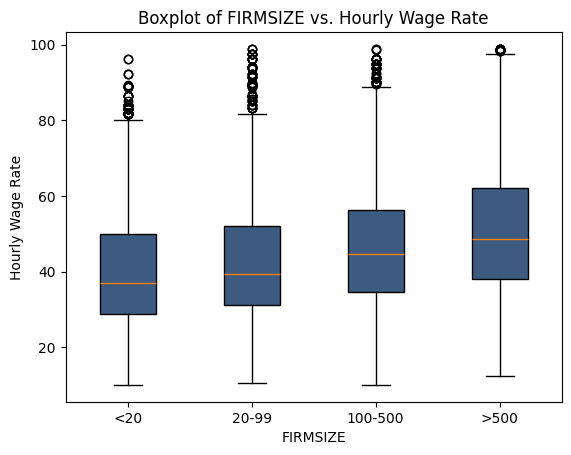

/tmp/ipython-input-3677458725.py:16: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  boxplot = plt.boxplot(data_dict.values(), labels=display_labels, patch_artist=True)


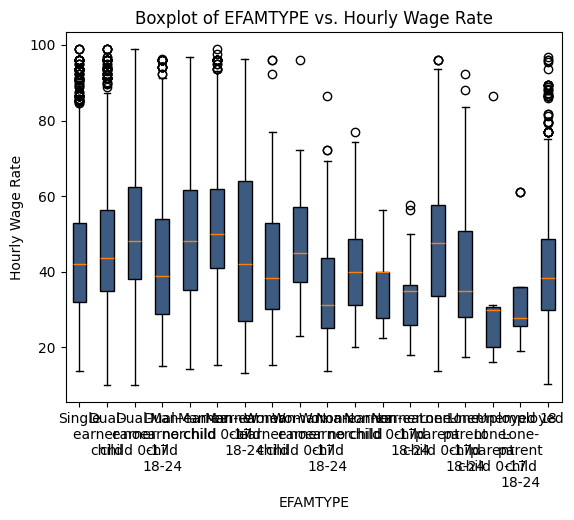

In [ ]:
# Boxplot of features vs Hourly wage rate
import textwrap

categorical_list = ["PROV", "AGE_12", "GENDER", "MARSTAT", "EDUC",
           "MJH", "COWMAIN", "IMMIG", "FTPTMAIN", "UNION", "PERMTEMP",
           "FIRMSIZE", "EFAMTYPE"]

for i in categorical_list:
  data_dict = {}
  for j in list(sorted(df[i].unique())):
    data_dict[j] = list(df[df[i] == j]["HRLYEARN"])

  current_cat_mappings = cat_mappings.get(i, {})
  display_labels = [textwrap.fill(str(current_cat_mappings.get(k, k)), width=10)
                    for k in data_dict.keys()]
  boxplot = plt.boxplot(data_dict.values(), labels=display_labels, patch_artist=True)
  for patch in boxplot["boxes"]:
    patch.set_facecolor("#3D5A80")
  plt.xlabel(i)
  plt.ylabel("Hourly Wage Rate")
  plt.title(f'Boxplot of {i} vs. Hourly Wage Rate')
  plt.show()

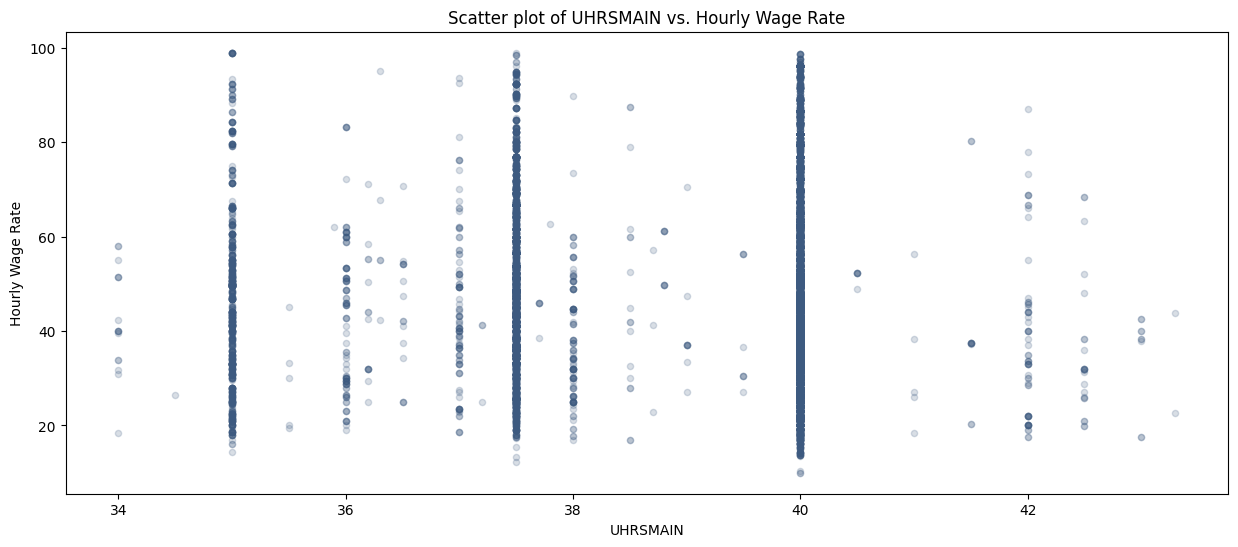

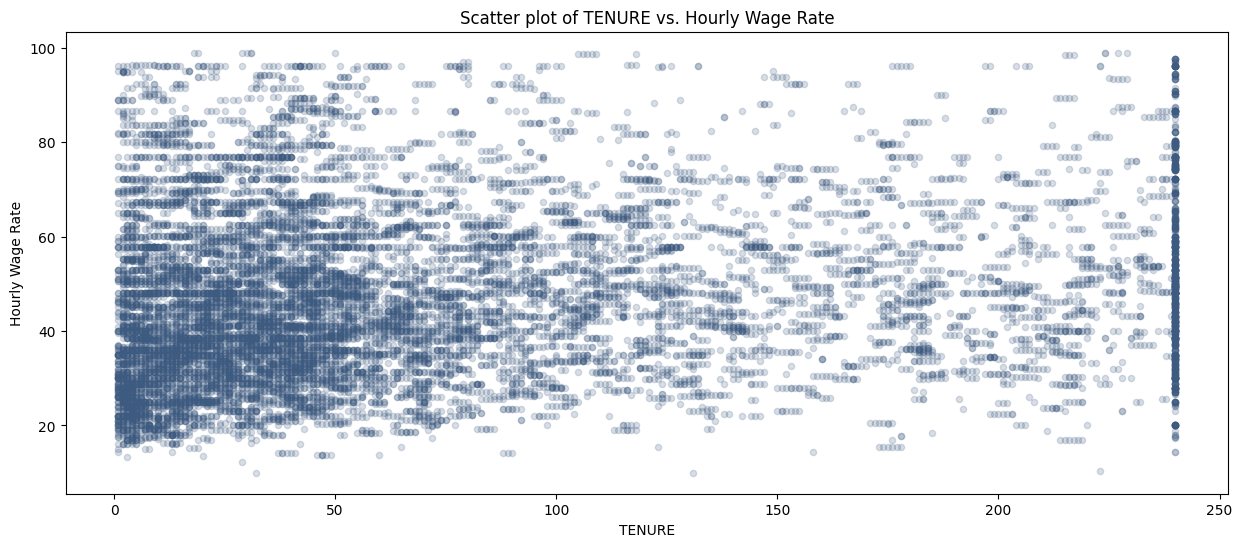

In [ ]:
# Scatter plot of numerical features vs. Hourly wage rate
numerical_list = ["UHRSMAIN", "TENURE"]#, "FINALWT"]

for i in numerical_list:
  plt.figure(figsize=(15,6))
  plt.scatter(df[i], df["HRLYEARN"], s=20, alpha=0.2, c="#3D5A80")
  plt.xlabel(i)
  plt.ylabel("Hourly Wage Rate")
  plt.title(f'Scatter plot of {i} vs. Hourly Wage Rate')
  plt.show()

In [ ]:
import sklearn
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import make_column_transformer
from sklearn.pipeline import make_pipeline
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [ ]:
# X,y for ML model
X = df.drop(columns=["HRLYEARN"])
# Using log for HRLYEARN to improve normality
y = np.log(df["HRLYEARN"])

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [ ]:
# List of nominal features without value of ranking, and exclude binary features
nominal_features = ["PROV", "MARSTAT", "COWMAIN", "IMMIG", "UNION",
                        "PERMTEMP", "EFAMTYPE"]#, "FINALWT"]

# Pipeline for each group of features
categorical_pipe = make_pipeline(OneHotEncoder(handle_unknown="ignore"))
preprocessor = make_column_transformer((categorical_pipe, nominal_features),
                                       remainder="passthrough")

regressor = RandomForestRegressor(random_state=42)
rfr = make_pipeline(preprocessor, regressor)

# RandomSearch for optimized parameter
param = {
    "randomforestregressor__n_estimators": [100, 200, 400],
    "randomforestregressor__max_depth": [None, 10, 20],
    "randomforestregressor__min_samples_leaf": [2, 5, 10],
    "randomforestregressor__max_features": ["sqrt", 0.5, 0.8]
}
rfr_cv = GridSearchCV(estimator=rfr, param_grid=param, cv=5,
                         scoring="neg_mean_squared_error", n_jobs=-1, verbose=2)
X_train_features = X_train.drop(columns=["FINALWT"])
rfr_cv.fit(X_train_features, y_train, randomforestregressor__sample_weight=X_train["FINALWT"])

Fitting 5 folds for each of 81 candidates, totalling 405 fits


/usr/local/lib/python3.12/dist-packages/sklearn/compose/_column_transformer.py:1667: FutureWarning: 
The format of the columns of the 'remainder' transformer in ColumnTransformer.transformers_ will change in version 1.7 to match the format of the other transformers.
At the moment the remainder columns are stored as indices (of type int). With the same ColumnTransformer configuration, in the future they will be stored as column names (of type str).
To use the new behavior now and suppress this warning, use ColumnTransformer(force_int_remainder_cols=False).

  warnings.warn(


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('columntransformer',
                                        ColumnTransformer(remainder='passthrough',
                                                          transformers=[('pipeline',
                                                                         Pipeline(steps=[('onehotencoder',
                                                                                          OneHotEncoder(handle_unknown='ignore'))]),
                                                                         ['PROV',
                                                                          'MARSTAT',
                                                                          'COWMAIN',
                                                                          'IMMIG',
                                                                          'UNION',
                                                                          'PERMTEMP',
                                                                          'EFAMTYPE'])])),
                                       ('randomforestregressor',
                                        RandomForestRegressor(random_state=42))]),
             n_jobs=-1,
             param_grid={'randomforestregressor__max_depth': [None, 10, 20],
                         'randomforestregressor__max_features': ['sqrt', 0.5,
                                                                 0.8],
                         'randomforestregressor__min_samples_leaf': [2, 5, 10],
                         'randomforestregressor__n_estimators': [100, 200,
                                                                 400]},
             scoring='neg_mean_squared_error', verbose=2)

In [ ]:
y_pred = rfr_cv.predict(X_test)

In [ ]:
# Evaluate regression model
print("R2 score:", r2_score(y_test, y_pred))
print("Mean absolute error:", mean_absolute_error(y_test, y_pred))
print("Mean squared error", mean_squared_error(y_test, y_pred))

R2 score: 0.6794285645753652
Mean absolute error: 0.13924808720796647
Mean squared error 0.045957442606477314


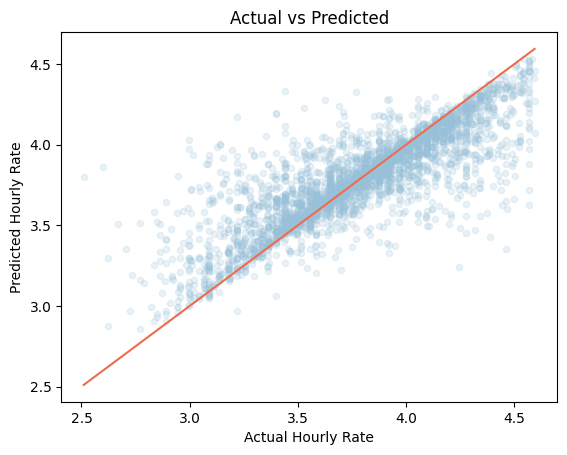

In [ ]:
# Visualize the y_test and y_pred
plt.scatter(y_test, y_pred, s=20, alpha=0.2, c="#98C1D9")
plt.plot([y_test.min(), y_test.max()],
         [y_test.min(), y_test.max()], color="#EE6C4D")
plt.xlabel("Actual Hourly Rate")
plt.ylabel("Predicted Hourly Rate")
plt.title("Actual vs Predicted")
plt.show()

Text(0.5, 1.0, 'Residual Plot')

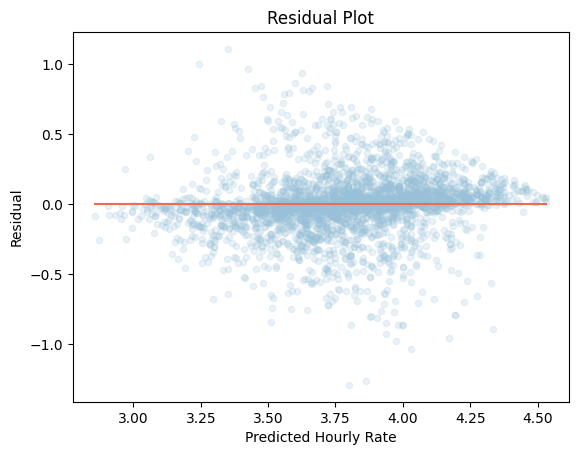

In [ ]:
# Visual residual
residual = y_test - y_pred
plt.scatter(y_pred, residual, s=20, alpha=0.2, c="#98C1D9")
plt.plot([y_pred.min(), y_pred.max()], [0, 0], color="#EE6C4D")
plt.xlabel("Predicted Hourly Rate")
plt.ylabel("Residual")
plt.title("Residual Plot")

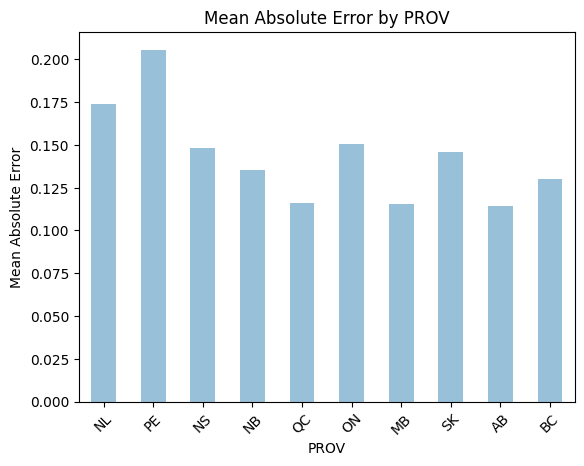

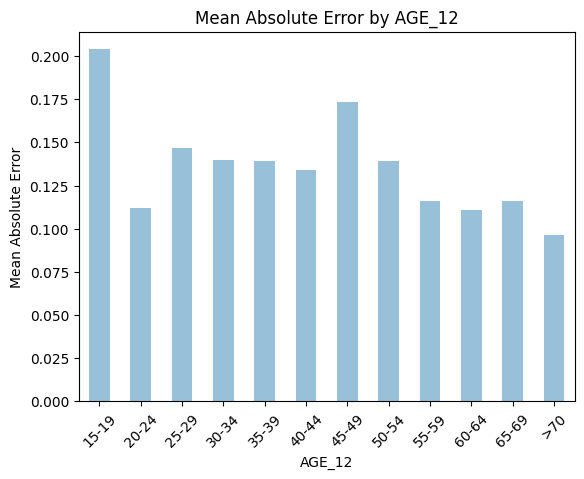

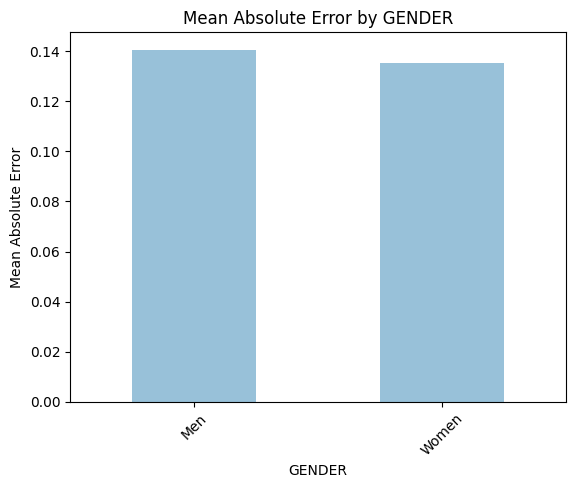

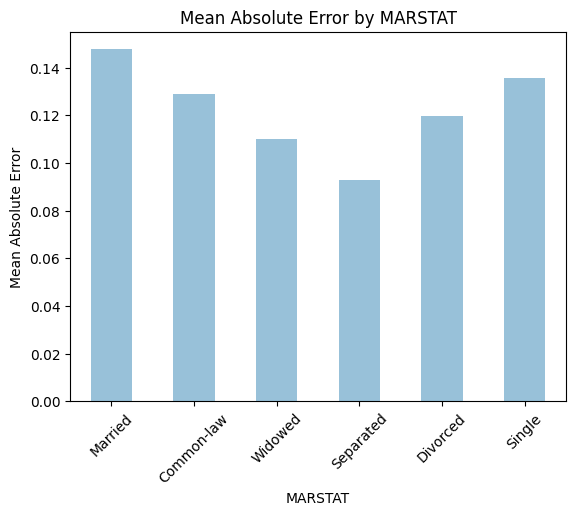

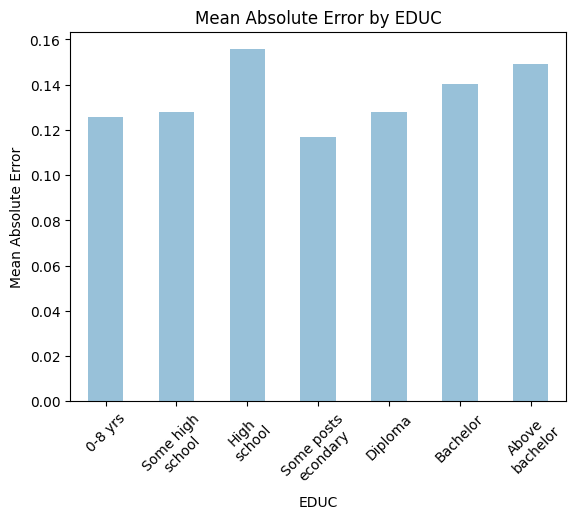

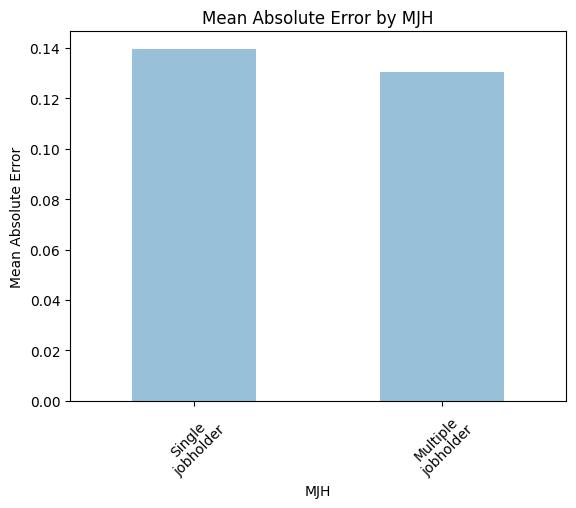

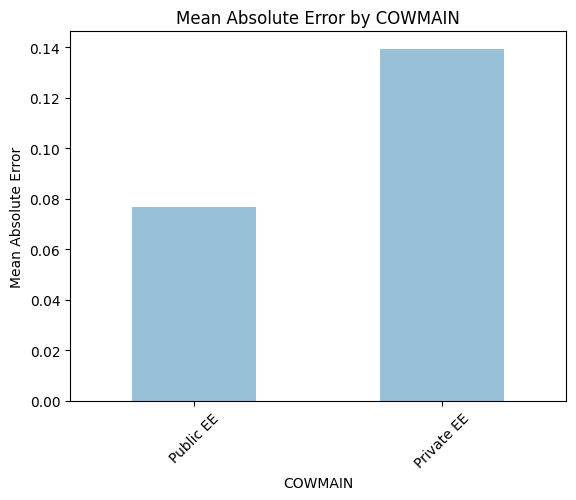

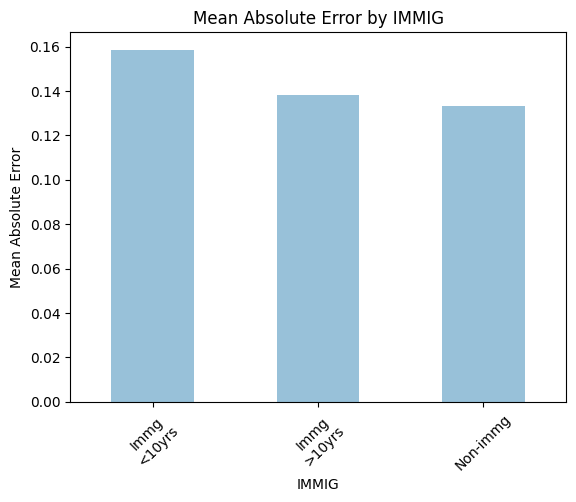

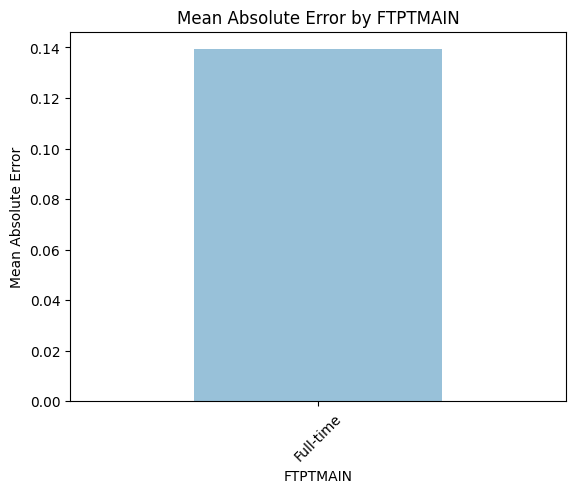

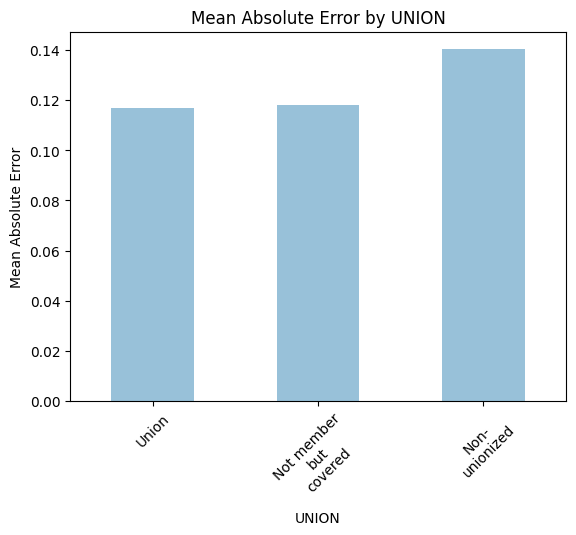

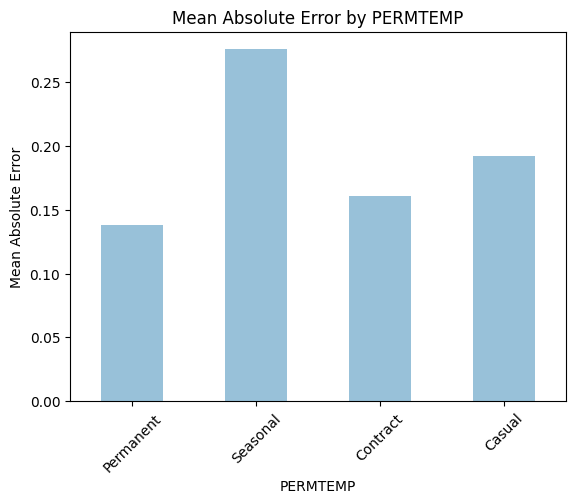

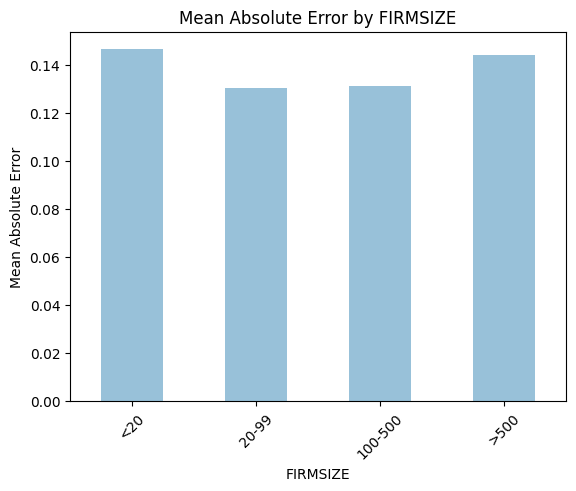

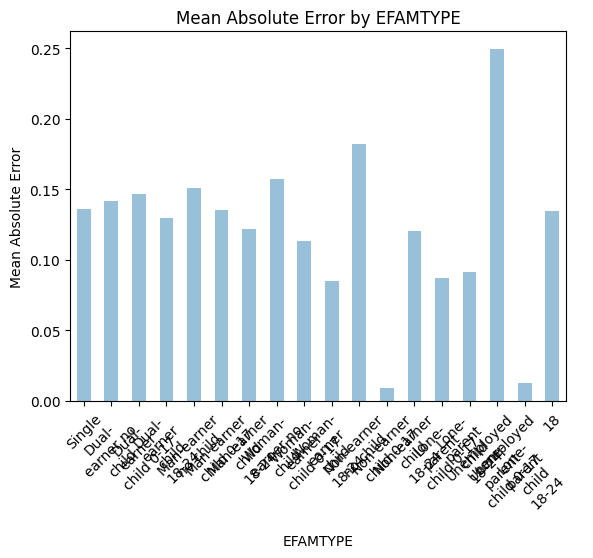

In [ ]:
# Error chart by features
for i in categorical_list:
  df_eval = pd.DataFrame({
      "Actual": y_test,
      "Predicted": y_pred,
      i: X_test[i]
  })
  df_eval["abs_error"] = abs(df_eval["Actual"] - df_eval["Predicted"])
  mae = df_eval.groupby(i)["abs_error"].mean()

  current_cat_mappings = cat_mappings.get(i, {})
  display_labels = [textwrap.fill(str(current_cat_mappings.get(k, k)), width=10)
                    for k in mae.index]
  mae_bar = mae.plot(kind="bar", color="#98C1D9")
  mae_bar.set_xticklabels(display_labels, rotation=45)
  plt.xlabel(i)
  plt.ylabel("Mean Absolute Error")
  plt.title(f'Mean Absolute Error by {i}')
  plt.show()


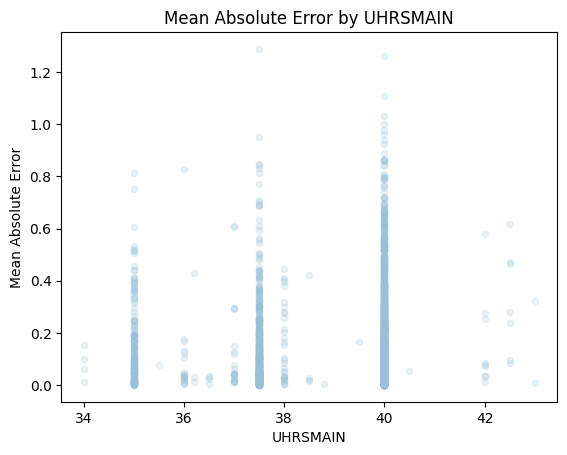

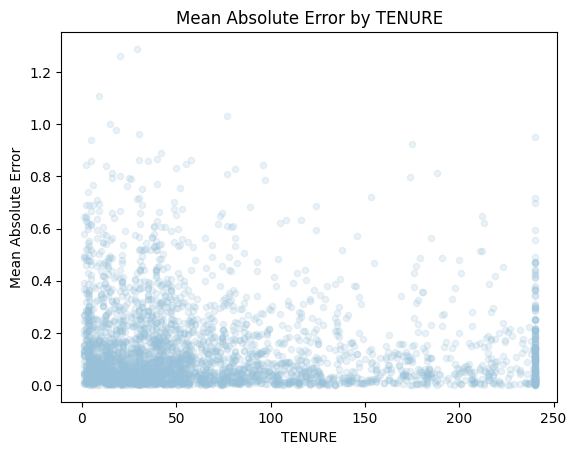

In [ ]:
for i in numerical_list:
  df_eval = pd.DataFrame({
      "Actual": y_test,
      "Predicted": y_pred,
      i: X_test[i]
  })
  df_eval["abs_error"] = abs(df_eval["Predicted"] - df_eval["Actual"])
  plt.scatter(df_eval[i], df_eval["abs_error"], s=20, alpha=0.2, color="#98C1D9")
  plt.xlabel(i)
  plt.ylabel("Mean Absolute Error")
  plt.title(f"Mean Absolute Error by {i}")
  plt.show()

In [ ]:
# Analyze feature important
feature_names = categorical_list + numerical_list
feature_importances = rfr_cv.best_estimator_.named_steps['randomforestregressor'].feature_importances_
top = sorted(zip(feature_importances, feature_names), reverse=True)
for importance, name in top:
  print(f"{name.ljust(20)} {importance:.3f}")

MJH                  0.025
EDUC                 0.020
UNION                0.020
FTPTMAIN             0.017
PERMTEMP             0.014
FIRMSIZE             0.010
IMMIG                0.005
GENDER               0.004
MARSTAT              0.004
COWMAIN              0.004
UHRSMAIN             0.003
TENURE               0.002
PROV                 0.002
AGE_12               0.001
EFAMTYPE             0.001
